In [6]:
import pandas as pd
data1=pd.read_csv("houses_to_rent_v2.csv")
data1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [14]:
data1['city'] = pd.factorize(data1['city'])[0]
data1['furniture'] = pd.factorize(data1['furniture'])[0]
data1['animal'] = pd.factorize(data1['animal'])[0]


In [15]:
import numpy as np
data1=data1[data1.floor.apply(lambda x: x.isnumeric())]
print(data1.shape)

(8231, 13)


In [16]:
X_data=data1.iloc[:,:-1]
Y_data=data1.iloc[:,-1]
Xtrain=data1.iloc[:7000,:-1]
Xtest=data1.iloc[7000:,:-1]
Ytrain=data1.iloc[:7000,-1]
Ytest=data1.iloc[7000:,-1]
data_train=data1.iloc[:7000]
print(Xtrain.shape)

(7000, 12)


In [17]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model = lm.fit(Xtrain,Ytrain)
predictions = model.predict(Xtest)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
       % mean_squared_error(Ytest,predictions ))
print('Variance score: %.2f' % r2_score(Ytest,predictions))

Mean squared error: 1.56
Variance score: 1.00


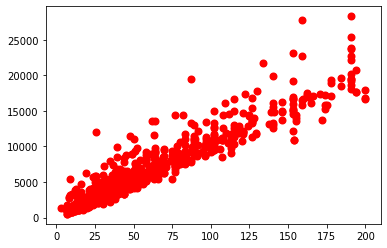

In [19]:
import matplotlib.pyplot as plt
plt.scatter(Xtest.iloc[:,11], Ytest, color='gray')
plt.scatter(Xtest.iloc[:,11],predictions, color='red', linewidth=2)
plt.show()

In [20]:
import statsmodels.formula.api
A00=Xtrain.iloc[:,0]
A0=Xtrain.iloc[:,1]
A=Xtrain.iloc[:,2]
B=Xtrain.iloc[:,3]
C=Xtrain.iloc[:,4]
D=Xtrain.iloc[:,5]
E=Xtrain.iloc[:,6]
F=Xtrain.iloc[:,7]
G=Xtrain.iloc[:,8]
H=Xtrain.iloc[:,9]
I=Xtrain.iloc[:,10]
J=Xtrain.iloc[:,11]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
fit1= statsmodels.formula.api.ols('Ytrain ~ A00+ A0+ A+ B+ C+ D+ E+ F+ G+ H+ I+ J', data= data_train).fit()
import statsmodels.api
table = statsmodels.api.stats.anova_lm(fit1)

In [27]:
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ytrain   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.136e+09
Date:                Fri, 01 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:16:34   Log-Likelihood:                -24032.
No. Observations:                7000   AIC:                         4.815e+04
Df Residuals:                    6955   BIC:                         4.846e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5374      0.366      1.469      0.1

In [ ]:
model_norm_residuals = fit1.get_influence().resid_studentized_internal
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0' , lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)),0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r,i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
plt.show()

7000


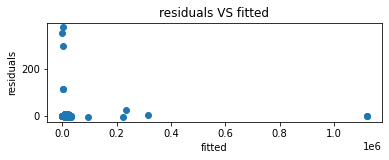

In [32]:
import seaborn as sns
model_fitted_y = fit1.fittedvalues
print(len(model_fitted_y))
model_residuals=fit1.resid
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_ylabel('residuals')
ax1.set_xlabel('fitted')
ax1.set_title('residuals VS fitted')
plt.scatter(model_fitted_y,model_residuals)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


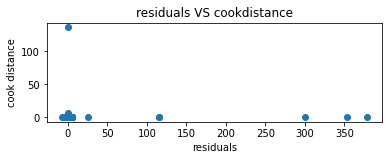

In [31]:
model_cooks = fit1.get_influence().cooks_distance[0]
model_residuals = fit1.resid
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.set_ylabel('cook distance')
ax1.set_xlabel('residuals')
ax1.set_title('residuals VS cookdistance')
plt.scatter(model_residuals,model_cooks)
plt.show()
